# 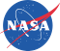 **NASA FIRMS - Visualization in Python**


This learning tutorial will show how to visualize FIRMS fire detection data. We will cover:

- projections
- mapping
- time since detection

**Programming language:** Python

**Libraries:** [pandas](https://pandas.pydata.org), [geopandas](https://geopandas.org), [matplotlib](https://matplotlib.org), [crs](https://pyproj4.github.io/pyproj/dev/api/crs/crs.html), [geodatasets](https://pypi.org/project/geodatasets/)


---

**LEVEL:** Intermediate

---

In this module, we will download a sample VIIRS SNPP dataset (~6MB) from **July 12th 2023** with time range from **0:00 to 19:50** (7:50pm) **GMT**. To better understand the sample dataset, please review module '*Data Ingest and Manipulation in Python*'.


---

## Projections

---

First, let's install our libraries and test they work

In [ ]:
# we need to install some libraries as they are not default on the system
!pip install geodatasets cartopy

import geopandas
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from geodatasets import get_path

<Axes: >

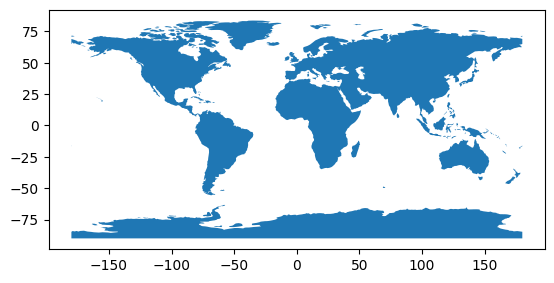

In [ ]:
# let's get our basic earth data

path = get_path("naturalearth.land")
world = geopandas.read_file(path)

# and test our libraries loaded

world.plot()

---

Let's look at two common projections:

(left-side) **EPSG:4326 - WGS 84**, latitude/longitude coordinate system based on the Earth's center of mass, used by the Global Positioning System among others.

(right-side) **EPSG:3857** - Web Mercator projection used for display by many web-based mapping tools, including Google Maps and OpenStreetMap.

For a quick overview of some of the other projections visit [USGS - Map Projections](https://pubs.usgs.gov/gip/70047422/report.pdf)

<GeoAxes: title={'center': 'EPSG:3857'}>

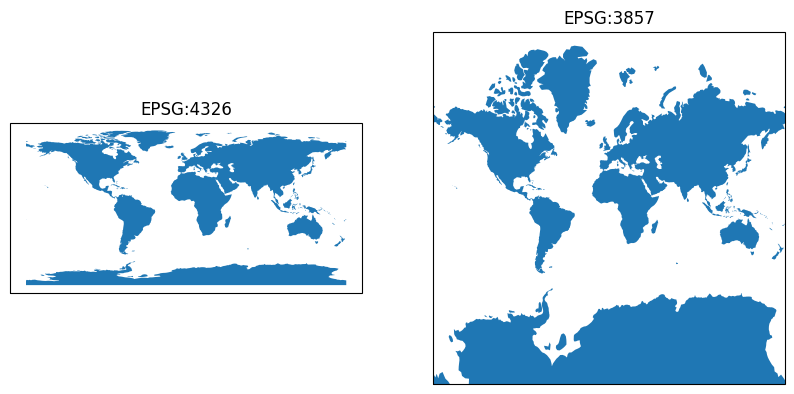

In [ ]:
crs = ccrs.epsg("3857")
world_epsg = world.to_crs(epsg="3857")

fig, axs = plt.subplots(1, 2, subplot_kw={"projection": crs}, figsize=(10, 5))
axs[0].set(title='EPSG:4326')
axs[1].set(title='EPSG:3857')
world.plot(ax=axs[0])
world_epsg.plot(ax=axs[1])

In our tutorial, we will be using EPSG:4326 (left side) as many science datasets utilize this projection.

---

## Mapping

---

Let's use our sample VIIRS SNPP dataset (~6MB) from **July 12th 2023** with time range from **0:00 to 19:50** (7:50pm) **GMT**. To better understand the sample dataset, please review module '*Data Ingest and Manipulation in Python*'.

In [ ]:
import pandas as pd
df = pd.read_csv('https://firms.modaps.eosdis.nasa.gov/content/notebooks/sample_viirs_snpp_071223.csv')

# show top 5 records
df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,0.05836,29.59085,295.64,0.38,0.59,2023-07-12,3,N,VIIRS,n,2.0NRT,275.15,0.83,N
1,0.48765,31.50760,296.73,0.51,0.66,2023-07-12,3,N,VIIRS,n,2.0NRT,275.15,0.56,N
2,2.15227,13.94524,305.26,0.51,0.49,2023-07-12,3,N,VIIRS,n,2.0NRT,287.94,1.08,N
3,2.15681,13.94618,319.05,0.51,0.49,2023-07-12,3,N,VIIRS,n,2.0NRT,288.77,1.81,N
4,2.15754,13.94131,301.13,0.51,0.50,2023-07-12,3,N,VIIRS,n,2.0NRT,288.17,1.81,N


In [ ]:
# now convert latitude, longitude values into point geometry

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
)

# show top 3 records
gdf.head(3)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,geometry
0,0.05836,29.59085,295.64,0.38,0.59,2023-07-12,3,N,VIIRS,n,2.0NRT,275.15,0.83,N,POINT (29.59085 0.05836)
1,0.48765,31.50760,296.73,0.51,0.66,2023-07-12,3,N,VIIRS,n,2.0NRT,275.15,0.56,N,POINT (31.50760 0.48765)
2,2.15227,13.94524,305.26,0.51,0.49,2023-07-12,3,N,VIIRS,n,2.0NRT,287.94,1.08,N,POINT (13.94524 2.15227)


**Note**: gdf is the same as df, except there is an extra column called 'geometry'

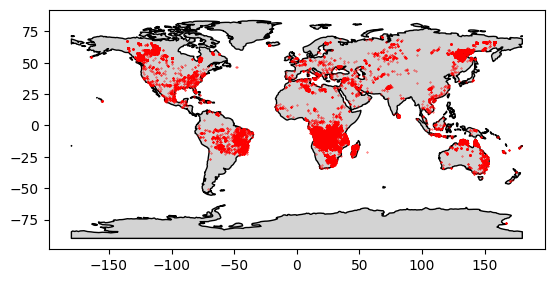

In [ ]:
# optional: set outline and fill colors
ax = world.plot(color="lightgrey", edgecolor="black")

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="red", markersize=0.1)

plt.show()


---
Let's subset our dataset to show fire detections in or near Canada using FIRMS [Regional Coordinates](https://firms.modaps.eosdis.nasa.gov/active_fire/coordinates.html)

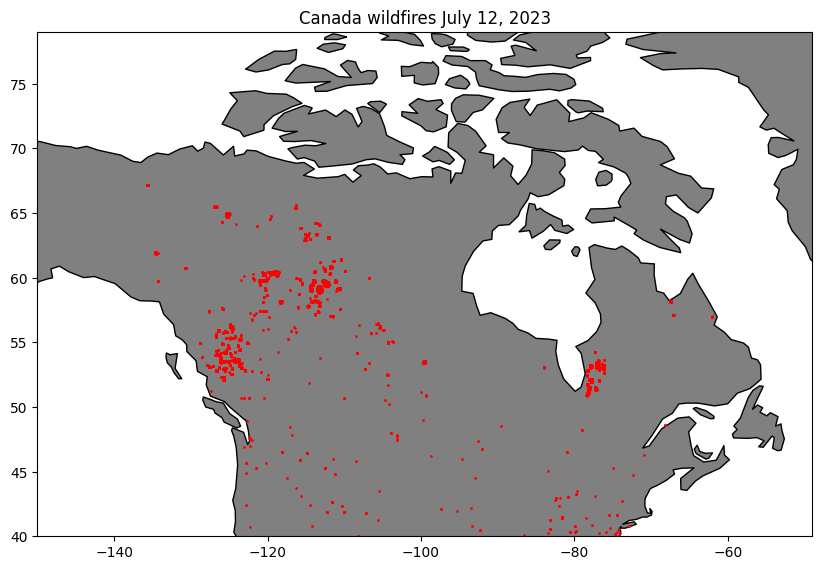

In [ ]:
# create Canada subset

df_canada = df[(df['longitude'] >= -150) & (df['latitude'] >= 40) & (df['longitude'] <= -49) & (df['latitude'] <= 79)].copy()

# create geometry for points using latitude and longitude and specifying projection as EPSG:4326

gdf = geopandas.GeoDataFrame(
    df_canada, geometry=geopandas.points_from_xy(df_canada.longitude, df_canada.latitude), crs="EPSG:4326"
)

# set our extent
extent = [-150, 40, -49, 79]
ax = world.plot(figsize=(10, 10), color="grey", edgecolor="black")
ax.set_xlim([extent[0],  extent[2]])
ax.set_ylim([extent[1],  extent[3]])

ax.set(title='Canada wildfires July 12, 2023')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="red", markersize=1)

plt.show()


---

## Time Since Detection

---

To further expand on our data, let's visualize it based on time when it was detected, so newer data has different color.

In this exercise, we will assume that **current date and time** is **2023 July 12, 19:50 (7:50pm) GMT** time. We will color code our detections:
- dark red; detections <= 1 hour
- red; detections > 1 hour but less than or equal to 4 hours
- orange; detections > 4hours and less than or equal to 12 hours
- yellow; detections older than 12 hours

To explain the datetime conversion and to better understand GMT / local time zones, please see module '*Data Ingest and Manipulation in Python*'

In [ ]:
# convert aqc_date and aqc_time to acq_datetime as datetime object
df_canada['acq_datetime'] = pd.to_datetime(df_canada['acq_date'] + ' ' + df_canada['acq_time'].astype(str).str.zfill(4), format='%Y-%m-%d %H%M')
gdf = geopandas.GeoDataFrame(
    df_canada, geometry=geopandas.points_from_xy(df_canada.longitude, df_canada.latitude), crs="EPSG:4326"
)
# find maximum time from our dataset since we are pretending current date time is July 12 2023, 19:50(7:50pm) GMT.
# if the data were recent, we would set dt_max = pd.Timestamp.now();
dt_max = gdf['acq_datetime'].max()

# create our subsets for 4 color classes

# less than or equal to 1 hour; gdf1 <= 1hour
gdf1 = gdf[gdf['acq_datetime'] >= (dt_max - pd.Timedelta(hours=1))]

# greater than 1 hour but less than or equal to 4 hours; gdf2 > 1 hour and gdf2 <= 4 hours
gdf2 = gdf[(gdf['acq_datetime'] >= (dt_max - pd.Timedelta(hours=4))) & (gdf['acq_datetime'] < (dt_max - pd.Timedelta(hours=1)))]

# greater than 4 hours but less than or equal to 12 hours; gdf3 > 4 hours and gdf2 <= 12 hours
gdf3 = gdf[(gdf['acq_datetime'] >= (dt_max - pd.Timedelta(hours=12))) & (gdf['acq_datetime'] < (dt_max - pd.Timedelta(hours=4)))]

# greater than 12 hours; gdf4 > 12 hours
gdf4 = gdf[gdf['acq_datetime'] < (dt_max - pd.Timedelta(hours=12))]

# now let's make sure the sizes are correct. They should all add up to 14045
print ('Sizes %i, %i, %i, %i from total of %i' % (gdf1.count()[0],gdf2.count()[0],gdf3.count()[0],gdf4.count()[0], gdf.count()[0]))

Sizes 3792, 913, 8449, 891 from total of 14045


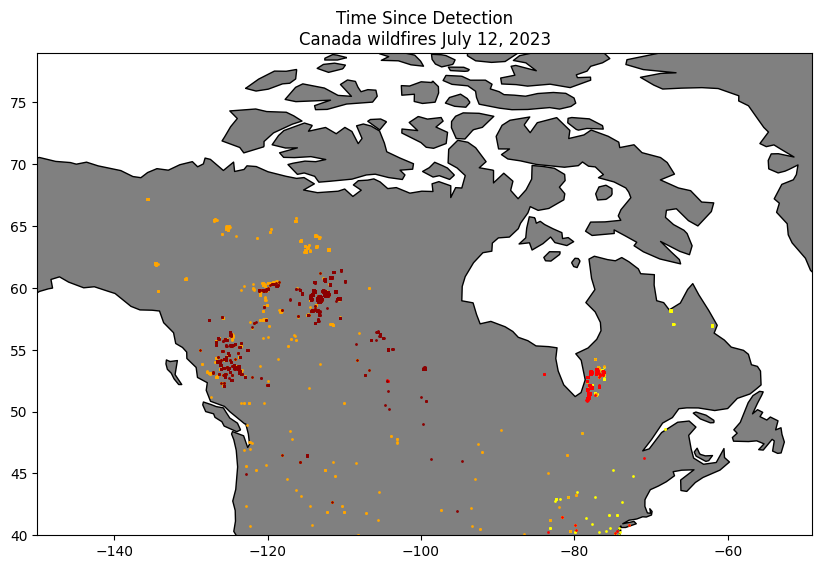

In [ ]:
# set our extent to Canada
extent = [-150, 40, -49, 79]
ax = world.plot(figsize=(10, 10), color="grey", edgecolor="black")

# set map extent
ax.set_xlim([extent[0],  extent[2]])
ax.set_ylim([extent[1],  extent[3]])

# add graph title
ax.set(title='Time Since Detection\nCanada wildfires July 12, 2023')

# Color code each set; also we are drawing in opposite order, so the older detections are drawn first so the newer ones are on the top
gdf4.plot(ax=ax, color="yellow", markersize=1)
gdf3.plot(ax=ax, color="orange", markersize=1)
gdf2.plot(ax=ax, color="red", markersize=1)
gdf1.plot(ax=ax, color="darkred", markersize=1)

plt.show()

---
At last, let's add some more detailed information to our map so our viewers can better understand the location of these fire detection.

In [ ]:
!pip install contextily
import contextily as cx

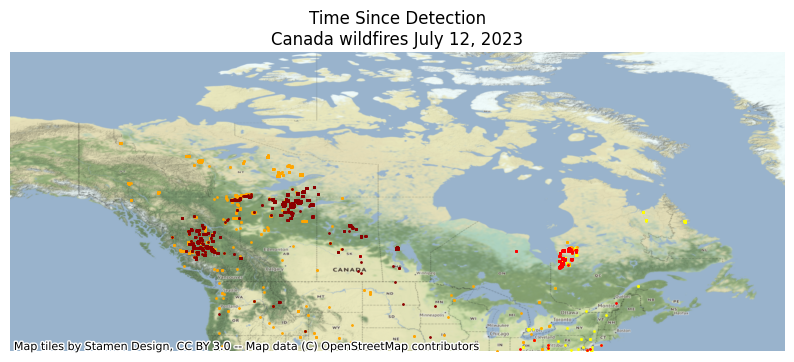

In [ ]:
extent = [-150, 40, -49, 79]
ax = world.plot(figsize=(10, 10), alpha=0)

# set our map extent
ax.set_xlim([extent[0],  extent[2]])
ax.set_ylim([extent[1],  extent[3]])

# set title
ax.set(title='Time Since Detection\nCanada wildfires July 12, 2023')
# turn off axis labels
ax.set_axis_off()

# Color code each set; also we are drawing in opposite order, so the older detections are drawn first so the newer ones are on the top
if gdf4.count()[0] > 0 :
  gdf4.plot(ax=ax, color="yellow", markersize=1)
if gdf3.count()[0] > 0 :
  gdf3.plot(ax=ax, color="orange", markersize=1)
if gdf2.count()[0] > 0 :
  gdf2.plot(ax=ax, color="red", markersize=1)
if gdf1.count()[0] > 0 :
  gdf1.plot(ax=ax, color="darkred", markersize=1)

# add basemap
cx.add_basemap(ax, crs=gdf1.crs)

# show our map plot
plt.show()


---
## Summary
---

Thank you for taking time to go over the tutorial. We hope you enjoyed it and if you have any questions or comments please use the 'Feedback' form at top of our site [firms.modaps.eosdis.nasa.gov](https://firms.modaps.eosdis.nasa.gov)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 44.8 MB/s eta 0:00:00


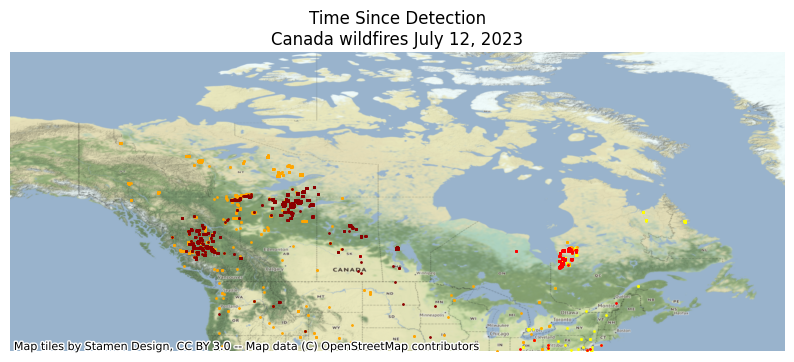

In [2]:
# To summarize our code
!pip install geodatasets cartopy contextily
import contextily as cx
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from geodatasets import get_path

# set our fire data
df = pd.read_csv('https://firms.modaps.eosdis.nasa.gov/content/notebooks/sample_viirs_snpp_071223.csv')
df_canada = df[(df['longitude'] >= -150) & (df['latitude'] >= 40) & (df['longitude'] <= -49) & (df['latitude'] <= 79)].copy()
df_canada['acq_datetime'] = pd.to_datetime(df_canada['acq_date'] + ' ' + df_canada['acq_time'].astype(str).str.zfill(4), format='%Y-%m-%d %H%M')
gdf = geopandas.GeoDataFrame(
    df_canada, geometry=geopandas.points_from_xy(df_canada.longitude, df_canada.latitude), crs="EPSG:4326"
)
dt_max = gdf['acq_datetime'].max()
gdf1 = gdf[gdf['acq_datetime'] >= (dt_max - pd.Timedelta(hours=1))]
gdf2 = gdf[(gdf['acq_datetime'] >= (dt_max - pd.Timedelta(hours=4))) & (gdf['acq_datetime'] < (dt_max - pd.Timedelta(hours=1)))]
gdf3 = gdf[(gdf['acq_datetime'] >= (dt_max - pd.Timedelta(hours=12))) & (gdf['acq_datetime'] < (dt_max - pd.Timedelta(hours=4)))]
gdf4 = gdf[gdf['acq_datetime'] < (dt_max - pd.Timedelta(hours=12))]

# set out plot
extent = [-150, 40, -49, 79]
world = geopandas.read_file(get_path("naturalearth.land"))
ax = world.plot(figsize=(10, 10), alpha=0)

ax.set_xlim([extent[0],  extent[2]])
ax.set_ylim([extent[1],  extent[3]])

ax.set(title='Time Since Detection\nCanada wildfires July 12, 2023')
ax.set_axis_off()

if gdf4.count()[0] > 0 :
  gdf4.plot(ax=ax, color="yellow", markersize=1)
if gdf3.count()[0] > 0 :
  gdf3.plot(ax=ax, color="orange", markersize=1)
if gdf2.count()[0] > 0 :
  gdf2.plot(ax=ax, color="red", markersize=1)
if gdf1.count()[0] > 0 :
  gdf1.plot(ax=ax, color="darkred", markersize=1)

cx.add_basemap(ax, crs=gdf1.crs)

plt.show()